# Part I - Prosper Loan Data

### by: Mayowa Shobande

## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling

#### Import Libraries

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#### Import Dataset

In [2]:
# importing dataset

loan = pd.read_csv("C:/Users/shoba/Downloads/prosperLoanData.csv")

print("Data imported successfully.")

Data imported successfully.


#### Assessing Data

In [3]:
# display the first five rows of loan data

loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# checking the size of the data

loan.shape

(113937, 81)

In [5]:
# Checking Non-Null and datatype of the columns in loan table.

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# showing datatypes of each column

loan.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [7]:
# display the unique values in Term column

loan.Term.unique()

array([36, 60, 12], dtype=int64)

In [8]:
# display the sum of null values in loan table

loan.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [9]:
# display the unique values of LoanStatus column

loan.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [10]:
# display the occupation of loan lenders

loan.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [11]:
# Display the total number of occupation in the table

loan.Occupation.nunique()

67

In [12]:
# show the unique employment status of loan lenders

loan.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [13]:
# show the unique values of incomeverifiable column

loan.IncomeVerifiable.unique()

array([ True, False])

In [14]:
# Checking descriptive statistics summary of loan table

loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> The dataset contains 81 columns and 113937 rows.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are Borrower's Loan status (LoanStatus), Borrower's Annual Percentage Rate (BorrowerAPR), Borrower's interest rate (BorrowerRate).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that would support the into my features of interest are Borrower's occupation (Occupation), Borrower's employment status (EmploymentStatus), Borrower's Income Range (IncomeRange), Borrower's Monthly Income (StatedMonthlyIncome) Loan Investors (Investors), Loan Term (Term).

### Quality Issues

1. Some columns are not needed.
2. Missing values are present in needed columns.
3. Some columns are in the wrong data type.

#### Columns Not Needed



ListingKey, ListingNumber, ListingCreationDate, CreditGrade, LenderYield, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating(Numeric), ProsperRating(Alpha), CurrentlyInGroup, GroupKey, DateCreditPulled, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, TotalTrades, TradesNeverDelinquent, TradesOpenedLast6Months, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees,LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, InvestmentFromFriendsCount, InvestmentFromFriendsAmount

#### Needed columns in the wrong datatype

1. LoanOriginationDate change to datetime datatype
2. ListingCategory (numeric) to category datatype
3. EmploymentStatus to category datatype
4. IncomeRange to category datatype
5. LoanStatus to category datatype

### Data Cleaning

In this section, loan dataframe would be cleaned for quality issues.

In [15]:
# create a copy of loan DataFrame

prosper_loan = loan.copy()

In [16]:
# drop columns not needed

prosper_loan.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'ClosedDate','CreditGrade', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperScore', 'ProsperRating (Alpha)', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'MemberKey', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees','LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Recommendations'], axis=1, inplace=True)

In [17]:
# display the first five rows of prosper_loan table

prosper_loan.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,...,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,PercentFunded,Investors
0,36,Completed,0.16516,0.1580,NaN,0,CO,Other,Self-employed,2.0,...,NaN,0,NaN,78,19141,9425,9/12/2007 0:00,Q3 2007,1.0,258
1,36,Current,0.12016,0.0920,6.0,2,CO,Professional,Employed,44.0,...,NaN,0,NaN,0,134815,10000,3/3/2014 0:00,Q1 2014,1.0,1
2,36,Completed,0.28269,0.2750,NaN,0,GA,Other,Not available,NaN,...,NaN,0,NaN,86,6466,3001,1/17/2007 0:00,Q1 2007,1.0,41
3,36,Current,0.12528,0.0974,6.0,16,GA,Skilled Labor,Employed,113.0,...,NaN,0,NaN,16,77296,10000,11/1/2012 0:00,Q4 2012,1.0,158
4,36,Current,0.24614,0.2085,3.0,2,MN,Executive,Employed,44.0,...,NaN,0,NaN,6,102670,15000,9/20/2013 0:00,Q3 2013,1.0,20


In [18]:
# convert LoanOriginationDate datatype from object to datetime

prosper_loan['LoanOriginationDate'] = prosper_loan['LoanOriginationDate'].astype('datetime64[ns]')

In [19]:
# convert ListingCategory (numeric) to category datatype

prosper_loan = prosper_loan.astype({"ListingCategory (numeric)":'category', "EmploymentStatus" : 'category', "ProsperRating (numeric)" : 'category', "IncomeRange" : 'category', "LoanStatus" : 'category'})

In [20]:
# display columns info

prosper_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Term                                 113937 non-null  int64         
 1   LoanStatus                           113937 non-null  category      
 2   BorrowerAPR                          113912 non-null  float64       
 3   BorrowerRate                         113937 non-null  float64       
 4   ProsperRating (numeric)              84853 non-null   category      
 5   ListingCategory (numeric)            113937 non-null  category      
 6   BorrowerState                        108422 non-null  object        
 7   Occupation                           110349 non-null  object        
 8   EmploymentStatus                     111682 non-null  category      
 9   EmploymentStatusDuration             106312 non-null  float64       
 

In [21]:
# Change values in ListingCategory variable to be Ordinal

# create a dictionary key for listingcategory (numeric)
listing_category_dict = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
                   5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby& Adoption', 9: 'Boat', 
                   10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: ' Green Loans', 13: 'Household Expenses', 14: 'Large purchases', 
                   15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

In [22]:
# create a new column 'listing_category' to show the new categorical variables

prosper_loan['listing_category'] = prosper_loan['ListingCategory (numeric)'].map(listing_category_dict)

In [23]:
# count unique values in listing_category column

prosper_loan.listing_category.value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby& Adoption          199
Cosmetic Procedure       91
Boat                     85
 Green Loans             59
RV                       52
Name: listing_category, dtype: int64

In [24]:
# Change values in ProsperRating (numeric) variable to be Ordinal

# create a dictionary key for ProsperRating (numeric)

prosper_rating_dict = {0: 'N/A', 1: 'HR', 2: 'E', 3: 'D', 4: 'C', 5: 'B', 6: 'A', 7: 'AA'}

In [25]:
# map ProsperRating (numeric)

prosper_loan['prosper_rating'] = prosper_loan['ProsperRating (numeric)'].map(prosper_rating_dict)

In [26]:
# count ordinal values prosper_rating 

prosper_loan.prosper_rating.value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: prosper_rating, dtype: int64

In [27]:
# prosper_loan columns datatypes

prosper_loan.dtypes

Term                                            int64
LoanStatus                                   category
BorrowerAPR                                   float64
BorrowerRate                                  float64
ProsperRating (numeric)                      category
ListingCategory (numeric)                    category
BorrowerState                                  object
Occupation                                     object
EmploymentStatus                             category
EmploymentStatusDuration                      float64
IsBorrowerHomeowner                              bool
CreditScoreRangeLower                         float64
CreditScoreRangeUpper                         float64
AvailableBankcardCredit                       float64
DebtToIncomeRatio                             float64
IncomeRange                                  category
IncomeVerifiable                                 bool
StatedMonthlyIncome                           float64
LoanKey                     

In [28]:
# count values in Occupation column

prosper_loan.value_counts('Occupation')

Occupation
Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Length: 67, dtype: int64

In [29]:
# count values in EmploymentStattus column

prosper_loan.value_counts('EmploymentStatus')

EmploymentStatus
Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
dtype: int64

In [30]:
# count values in IncomeRange column

prosper_loan.value_counts('IncomeRange')

IncomeRange
$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
dtype: int64

In [31]:
# count values in ListingCategory (numeric)

prosper_loan.value_counts('ListingCategory (numeric)')

ListingCategory (numeric)
1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
dtype: int64

In [32]:
# count values in LoanOriginationDate

prosper_loan.value_counts('LoanOriginationDate')

LoanOriginationDate
2014-01-22    491
2013-11-13    490
2014-02-19    439
2013-10-16    434
2014-01-28    339
             ... 
2009-07-24      1
2009-07-23      1
2008-10-17      1
2005-11-18      1
2005-11-15      1
Length: 1873, dtype: int64

In [33]:
# convert the LoanOriginationDate to datetime

# add a column for Year
prosper_loan['Year'] = prosper_loan['LoanOriginationDate'].dt.year

In [34]:
# display unique values in Year

prosper_loan.Year.unique()

array([2007, 2014, 2012, 2013, 2006, 2010, 2011, 2008, 2009, 2005],
      dtype=int64)

## Univariate Exploration

#### Visualize Employment Status of Borrowers using Seaborn CountPlot

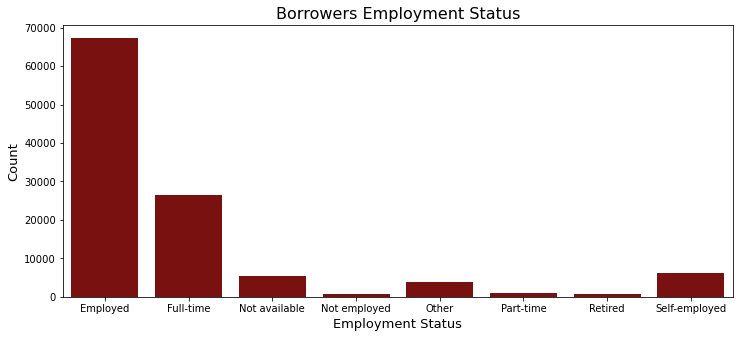

In [35]:
# figuresize
plt.figure(figsize = [12, 5])

# bar color
base_color = 'darkred'

# countplot
sns.countplot(data = prosper_loan, x = 'EmploymentStatus', color = base_color);
plt.xlabel('Employment Status', fontsize = '13')
plt.ylabel('Count', fontsize = '13' )
plt.title('Borrowers Employment Status', fontsize = 16);

##### Observation(s)

1. The highest number of borrowers fall in 'Employed' category.
2. Borrowers who fall in Unempolyed, Part-time, Retired categories are the least number of borrowers.

#### Visualize Borrowers Income Range Using Seaborn Countplot

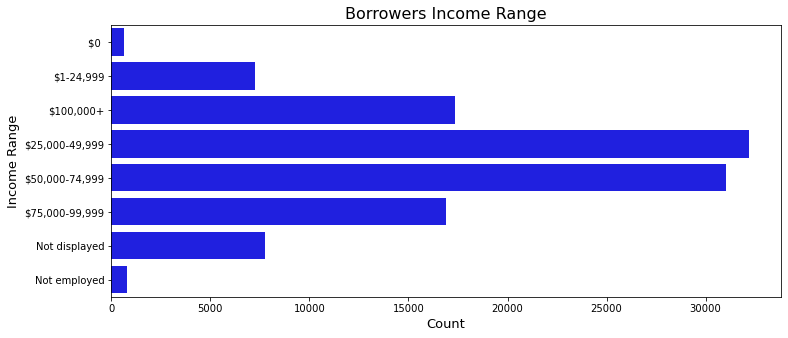

In [36]:
# figuresize
plt.figure(figsize = [12, 5])

# bar color
base_color = 'blue'

# countplot
sns.countplot(data = prosper_loan, y = 'IncomeRange', color = base_color);
plt.xlabel('Count', fontsize = '13');
plt.ylabel('Income Range', fontsize = '13');
plt.title('Borrowers Income Range', fontsize = 16);

#### Observation(s)

1. Employed borrowers who earn $25,000 - $49,999 are more than borrowers in other income range.
2. Borrowers who earn $0 or unemployed are least in the income range table.

#### Visualize Borrowers Occupation

Text(0.5, 1.0, 'Borrowers Occupation')

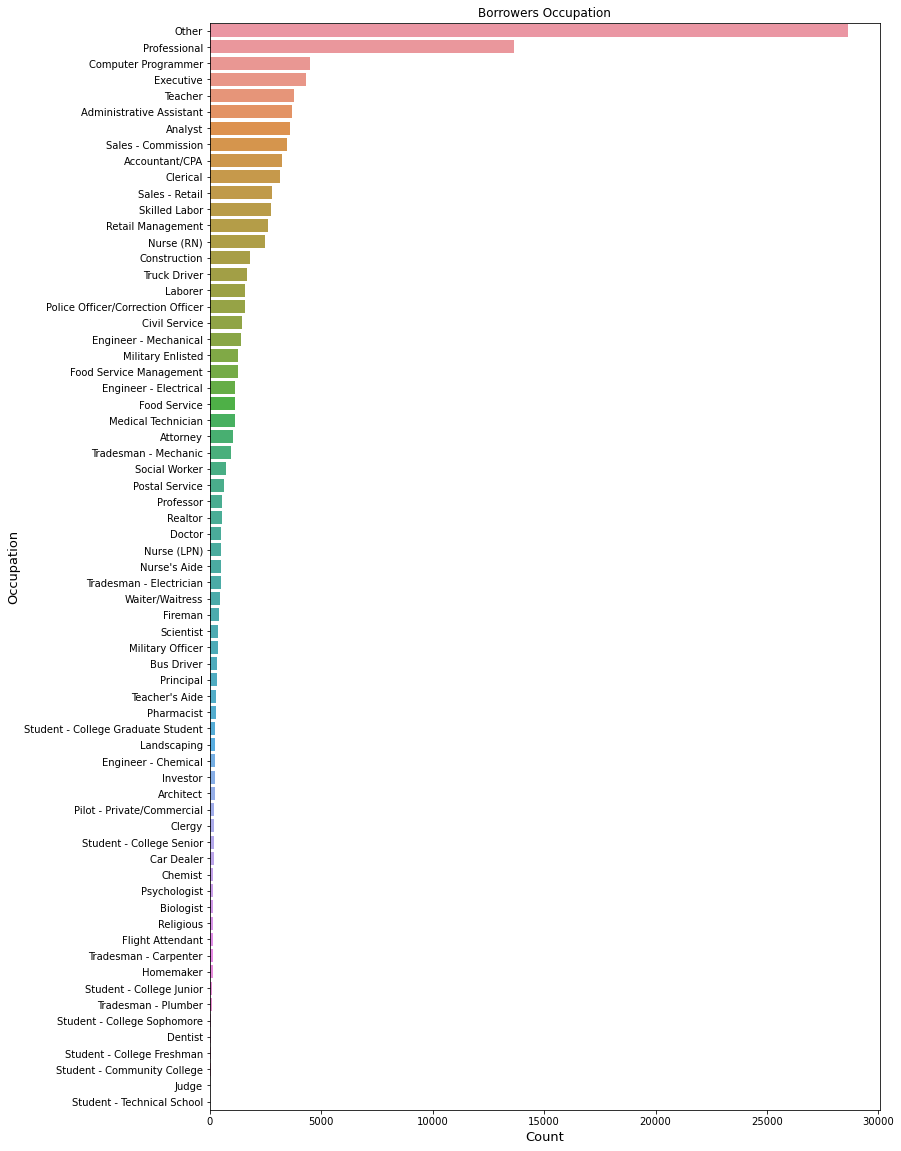

In [37]:
# figuresize
plt.figure(figsize = [12, 20])

# countplot
sns.countplot(y = 'Occupation', data = prosper_loan, order = prosper_loan['Occupation'].value_counts().index)
plt.xlabel('Count', fontsize = '13')
plt.ylabel('Occupation', fontsize = '13')
plt.title('Borrowers Occupation')

Top five occupation of borrowers apart from 'Others' are Professional, Computer Programmer, Executive,Teacher, Administrative Assistant.

#### Visualize Borrowers State

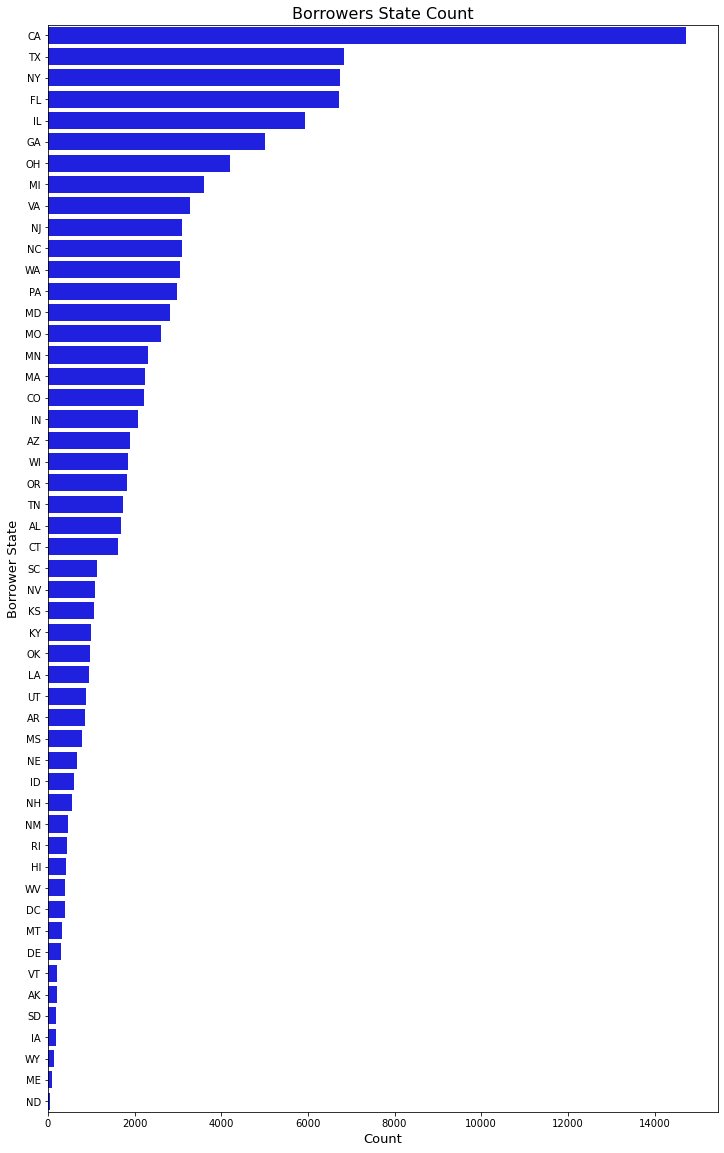

In [38]:
# figuresize
plt.figure(figsize = [12, 20])

# bar color
base_color = 'blue'

# countplot
sns.countplot(data = prosper_loan, y = 'BorrowerState', color = base_color, order = prosper_loan['BorrowerState'].value_counts().index);
plt.xlabel('Count', fontsize = '13');
plt.ylabel('Borrower State', fontsize = '13');
plt.title('Borrowers State Count', fontsize = '16');

#### Visualize Prosper Rating Count

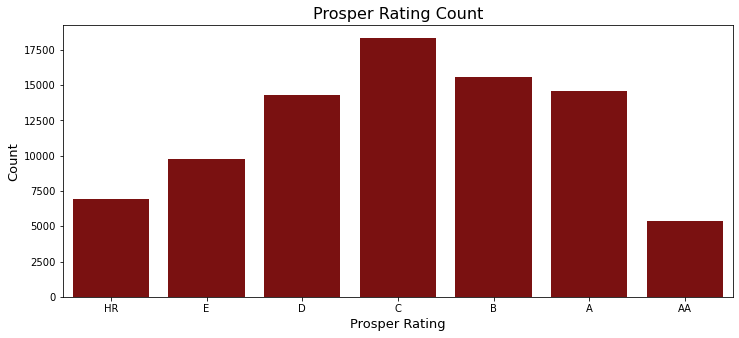

In [39]:
plt.figure(figsize = [12, 5])

# bar color
base_color = 'darkred'

# countplot
sns.countplot(data = prosper_loan, x = 'prosper_rating', color = base_color);
plt.xlabel('Prosper Rating', fontsize = '13');
plt.ylabel('Count', fontsize = '13')
plt.title('Prosper Rating Count', fontsize = 16);

#### Observation(s)

1. Borrowers with 'C' prosper rating are more than borrowers with other prosper ratings.

#### Visualize the Distribution of Lower Bounds of Credit Score and Upper Bounds of Credit Score

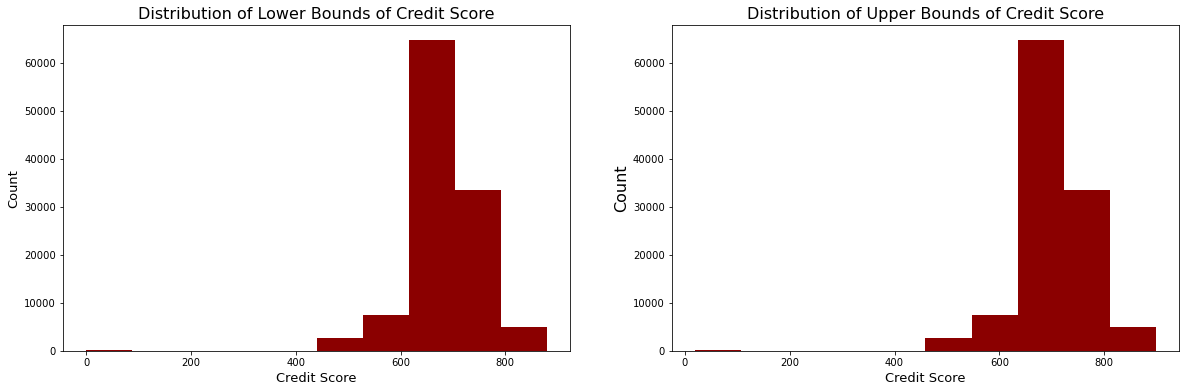

In [40]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
plt.hist(data = prosper_loan, x = 'CreditScoreRangeLower', color = base_color);
plt.xlabel('Credit Score', fontsize = 13);
plt.ylabel('Count', fontsize = 13);
plt.title('Distribution of Lower Bounds of Credit Score', fontsize = 16);

plt.subplot(1,2,2)
plt.hist(data = prosper_loan, x = 'CreditScoreRangeUpper', color = base_color);
plt.xlabel('Credit Score', fontsize = 13);
plt.ylabel('Count', fontsize = 16);
plt.title('Distribution of Upper Bounds of Credit Score', fontsize = 16);

#### Observation(s)

1. Lower bounds of credit score and Upper bound of credit score have the same values and distribution.
2. Credit scores of range 600-700 have the highest distribution.

#### Distribution of Borrower Annual Percentage Rate

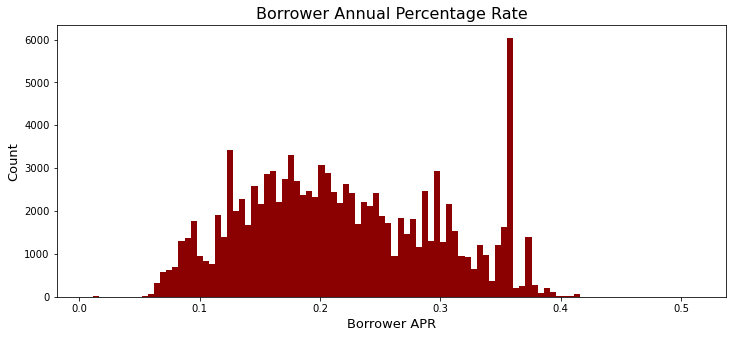

In [41]:
# figuresize
plt.figure(figsize=[12, 5])

# distribution plot of Borrowers Annual Percentage Rate

plt.hist(data = prosper_loan, x = 'BorrowerAPR', color = base_color, bins = 100);
plt.xlabel('Borrower APR', fontsize = 13);
plt.ylabel('Count', fontsize = 13);
plt.title('Borrower Annual Percentage Rate', fontsize = 16);


#### Observation(s)

1. Borrowers annual percentage rate is highly distributed fom point 0.1 to 0.3

#### Visualize Loan Term

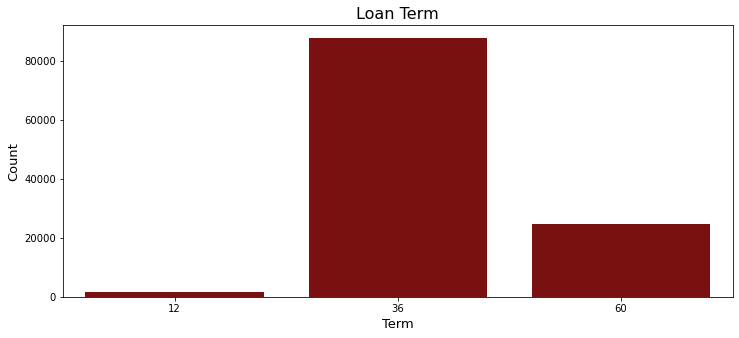

In [42]:
# figuresize
plt.figure(figsize = [12, 5])

# bar color
base_color = 'darkred'

# countplot
sns.countplot(data = prosper_loan, x = "Term", color = base_color);
plt.xlabel('Term', fontsize = '13');
plt.ylabel('Count', fontsize = '13');
plt.title('Loan Term', fontsize = '16');

#### Observation(s)

1. The highest loan term is 60 months.
2. Most approved loan term is 36 months.

#### Visualize Borrower Home Owner Status

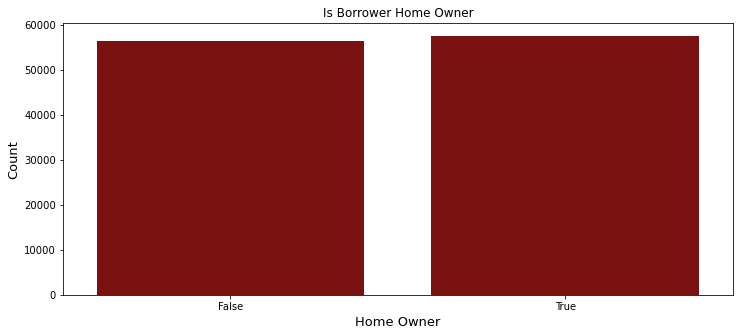

In [43]:
# figuresize
plt.figure(figsize = [12, 5])

# bar color
base_color = 'darkred'

# countplot
sns.countplot(data = prosper_loan, x = "IsBorrowerHomeowner", color = base_color);
plt.xlabel('Home Owner', fontsize = '13');
plt.ylabel('Count', fontsize = '13');
plt.title('Is Borrower Home Owner');

#### Observation(s)

1. Most borrowers are Home owners.
2. The difference between the number of count of home owners and number of count of borrowers who don't own a home is little.

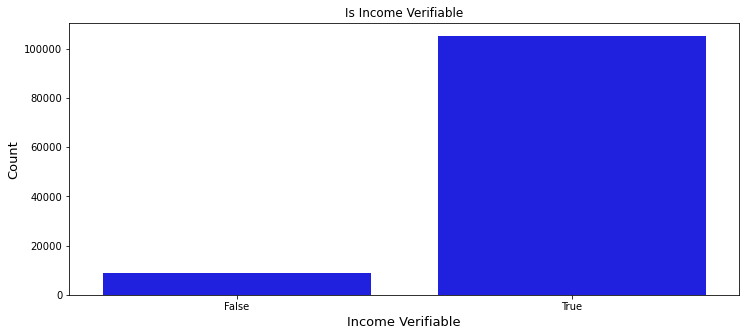

In [44]:
plt.figure(figsize = [12, 5])

# bar color
base_color = 'blue'

# countplot
sns.countplot(data = prosper_loan, x = "IncomeVerifiable", color = base_color);
plt.xlabel('Income Verifiable', fontsize = '13');
plt.ylabel('Count', fontsize = '13');
plt.title('Is Income Verifiable');

#### Observation(s)

1. Borrowers loan status are mostly verified.

#### Visualize Distribution of Loan Original Amount

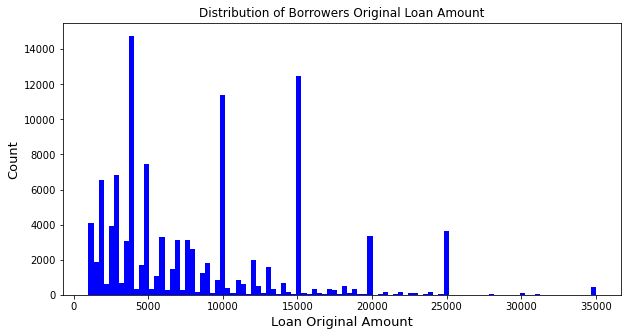

In [45]:
# figuresize
fig = plt.figure(figsize = (10, 5))

# plot histplot
plt.hist(data = prosper_loan, x = 'LoanOriginalAmount', color = 'blue', bins = 100)
plt.xlabel('Loan Original Amount', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Distribution of Borrowers Original Loan Amount')

plt.show()

#### Observation(s)

1. Less than 2000 Borrowers' loan original amount fall in the range of 25000 and 35000.
2. The highest number of original loan amount is a little bit before $5000.


#### Distribution of Borrowers Annual Percentage Rate

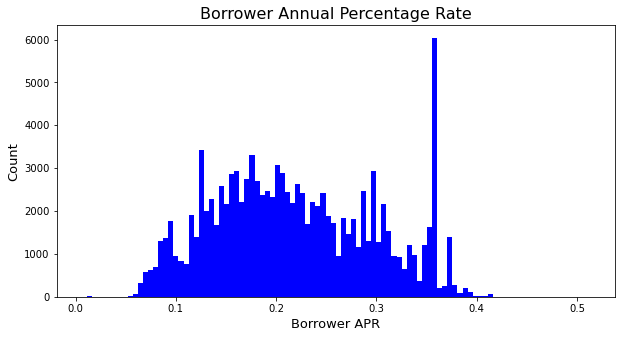

In [46]:
# figuresize
plt.figure(figsize=[10, 5])

# distribution plot of Borrowers Annual Percentage Rate

plt.hist(data = prosper_loan, x = 'BorrowerAPR', color = 'blue', bins = 100);
plt.xlabel('Borrower APR', fontsize = 13);
plt.ylabel('Count', fontsize = 13);
plt.title('Borrower Annual Percentage Rate', fontsize = 16);


#### Observation(s)

1. The distribution of Borrowers Annual Percentage Ratte is right skewed.

#### Distribution of Borrowers Interest Rate

Text(0.5, 1.0, 'Borrowers Interest Rate')

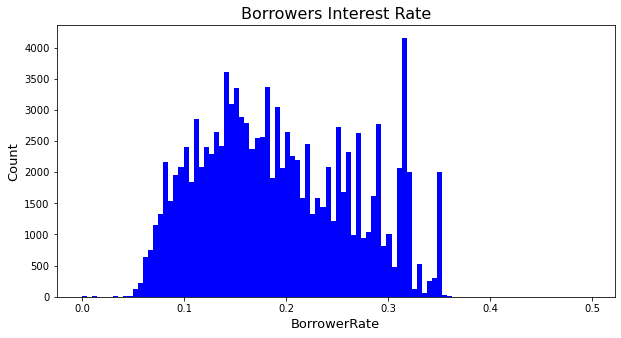

In [47]:
# figuresize
fig = plt.figure(figsize = (10, 5))

# plot histplot
plt.hist(data = prosper_loan, x = 'BorrowerRate', color = 'blue', bins = 100)
plt.xlabel('BorrowerRate', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Borrowers Interest Rate', fontsize = '16')

#### Observation(s)

1. Interest rates were highly distributed from points 0.1 to 0.25.
2. There was no distribution of interest rates at point 0.4  and above.
3. The distribution plot shows a decline from point 1.5.
4. A little above point 0.3 has the highest number of distributed interest rate.

#### Visualize Borrowers Loan Status

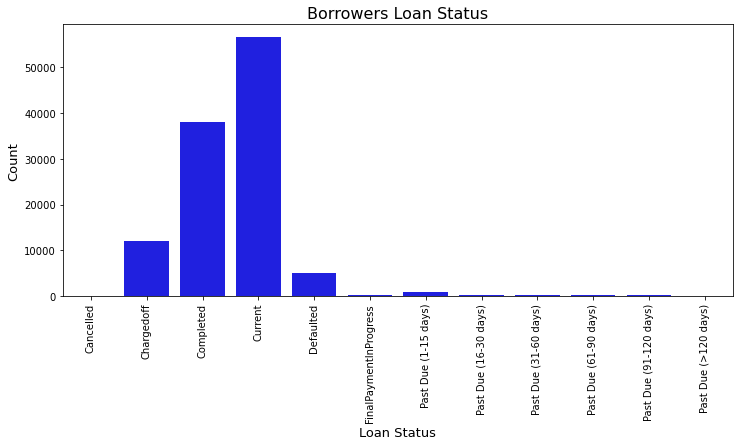

In [48]:
# figuresize
plt.figure(figsize = [12, 5])

# bar color
base_color = 'blue'

# countplot
sns.countplot(data = prosper_loan, x = 'LoanStatus', color = base_color);
plt.xlabel('Loan Status', fontsize = '13')
plt.ylabel('Count', fontsize = '13' )
plt.title('Borrowers Loan Status', fontsize = 16);
plt.xticks(rotation = '90')

# show plot
plt.show()

#### Observation(s)

1. Less than 10000 borrowers loan status is past due dates.
2. Over 50000 borrowers loan status is currnt.
3. Over 30000 borrowers have completed the repayment of their loan.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Borrowers interest rate declines from points 1.5 and no borrower had an interest rate of 0.4 points and above. It shows that borrowers want loans with low interest rates. Borrowers Annual Percentage Rate is highly distributed from points 0.05 to 0.3.
For Borrowers Loan Status, majority of the borrowers comply with the loan repayment method. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Transformed Loan status, Prosper ratings, Listing categories, Employment status variables and Income range variables to categorical variables inorder to get a tidy data for visualizations. For Borrowers ocuppation, borrowers who wrote 'others' are more than borrowers with specified occupation. 


## Bivariate Visualization

In this section, Bivariate visualization would be perfored to show the relationship between two variables

In [49]:
# select numerical variables in prosper loan dataframe

numerical_variable = prosper_loan.select_dtypes(include = np.number)

In [50]:
# display information of numerical variables

numerical_variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Term                                 113937 non-null  int64  
 1   BorrowerAPR                          113912 non-null  float64
 2   BorrowerRate                         113937 non-null  float64
 3   EmploymentStatusDuration             106312 non-null  float64
 4   CreditScoreRangeLower                113346 non-null  float64
 5   CreditScoreRangeUpper                113346 non-null  float64
 6   AvailableBankcardCredit              106393 non-null  float64
 7   DebtToIncomeRatio                    105383 non-null  float64
 8   StatedMonthlyIncome                  113937 non-null  float64
 9   TotalProsperLoans                    22085 non-null   float64
 10  TotalProsperPaymentsBilled           22085 non-null   float64
 11  OnTimeProsper

#### Visualize Correlation plot of Some selected numerical variables

In [51]:
# select columns needed for the correlation plot

numerical = ['BorrowerAPR', 'BorrowerRate', 'CreditScoreRangeUpper','AvailableBankcardCredit', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'Investors']


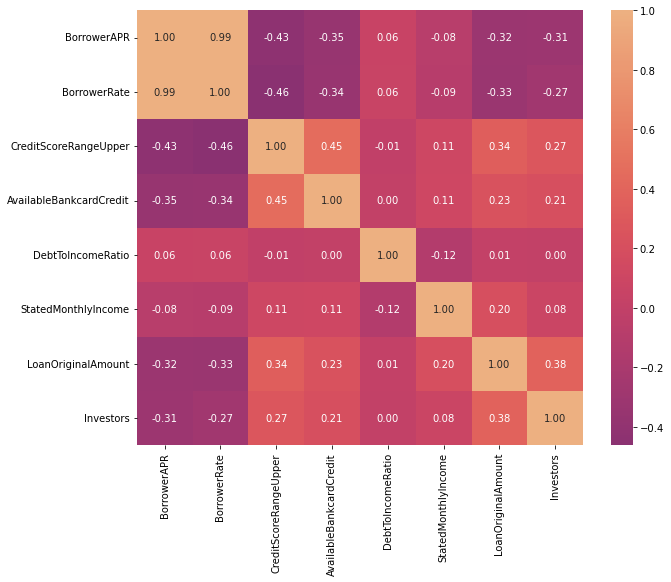

In [52]:
# figuresize
plt.figure(figsize = [10, 8])

sns.heatmap(prosper_loan[numerical].corr(), annot = True, fmt = '.2f', cmap = 'flare_r', center = 0);

#### Observation(s)

1. Borrowers interest rate and borrowers annual percentage rate have a positive correlation.
2. Credit score range upper and Available bank card credit have  possive correlation.

#### Visualize Correlation Between Borrowers Interest Rate and Borrowers Annual Percentage Rate

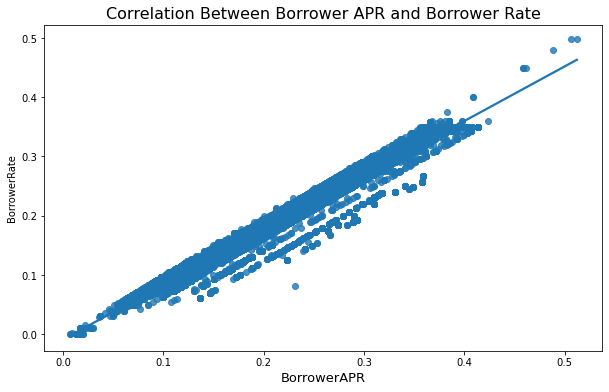

In [53]:
# figure size
plt.figure(figsize = [10, 6])
plt.xlabel('Borrowers Annual Percentage Rate', fontsize = '13')
plt.ylabel('Borrowers Interest Rate')
plt.title('Correlation Between Borrower APR and Borrower Rate', fontsize = '16')
sns.regplot(data = prosper_loan, x = 'BorrowerAPR', y = 'BorrowerRate');

#### Observation(s)

1. The correlation plot between Borrowers Interest Rate and Borrowers Annual Percentage Rate is positively high.

#### Prosper Ratings VS Borrower Rate

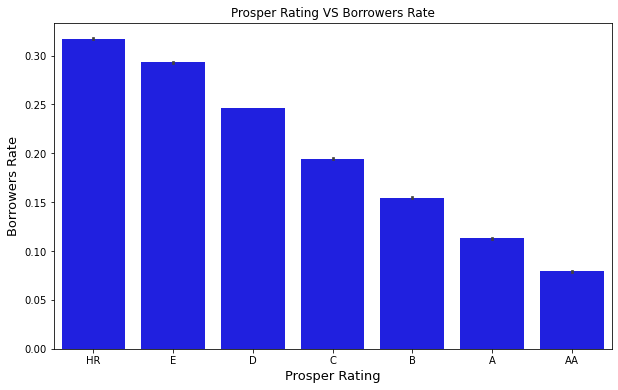

In [54]:
# figuresize
fig = plt.figure(figsize = (10, 6))

# Barplot
sns.barplot(x = 'prosper_rating', y = 'BorrowerRate', data = prosper_loan, color = 'blue')
plt.xlabel('Prosper Rating', fontsize = 13)
plt.ylabel('Borrowers Rate', fontsize = 13)
plt.title('Prosper Rating VS Borrowers Rate')
plt.show()

#### Observation(s)

1. HR rating had the highest borrower's interest rate.
2. AA rating had the least borrower's interest rate.

#### Visualize Borrowers Income Range VS Borrowers Loan Original Amount

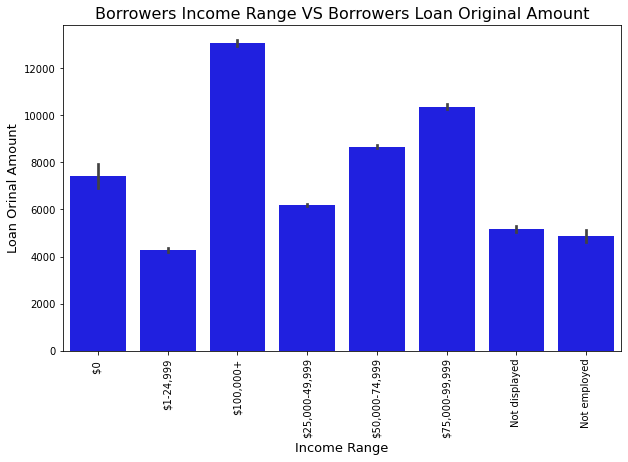

In [55]:
# figuresize
fig = plt.figure(figsize = (10, 6))

# barplot
sns.barplot(x = 'IncomeRange', y = 'LoanOriginalAmount', data = prosper_loan, color = 'blue')
plt.xlabel('Income Range', fontsize = 13)
plt.ylabel('Loan Orinal Amount', fontsize = 13)
plt.title('Borrowers Income Range VS Borrowers Loan Original Amount', fontsize = '16')
plt.xticks(rotation = 90)

plt.show()

#### Observation(s)

1. High income earners have high loan amount.

#### Visualize Borrowers Loan Status VS Borrowers Loan Original Amount

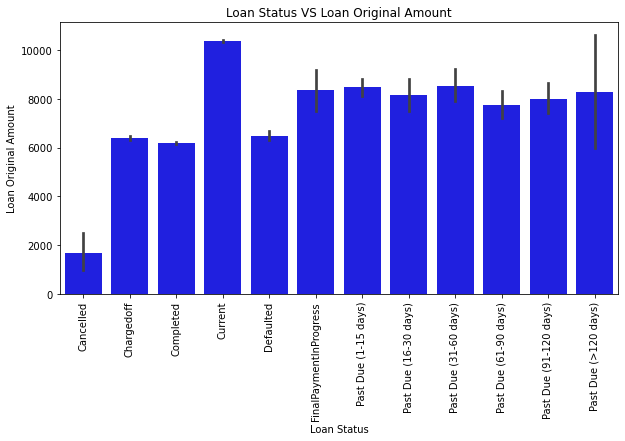

In [56]:
# figuresize
fig = plt.figure(figsize = (10, 5))

# barplot
sns.barplot(x = 'LoanStatus', y = 'LoanOriginalAmount', data = prosper_loan, color = 'blue')
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount')
plt.title('Loan Status VS Loan Original Amount')
plt.xticks(rotation = 90)

plt.show()

#### Observation(s)

1. Borrowers with 'past due date' loan status acquired high loan original amount.

#### Visualize Investors VS Borrowers Employment Status

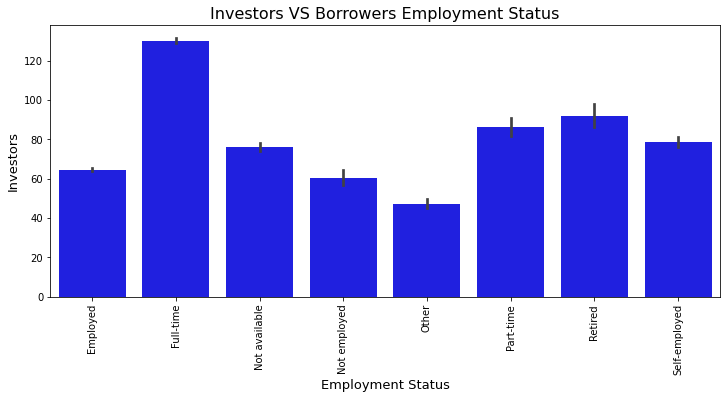

In [57]:
# figuresize
plt.figure(figsize = [12, 5])

# barplot
sns.barplot(data = prosper_loan, y = 'Investors', x='EmploymentStatus', color=base_color)
plt.xlabel('Employment Status', fontsize = '13')
plt.ylabel('Investors', fontsize = '13')
plt.title('Investors VS Borrowers Employment Status', fontsize = '16')
plt.xticks(rotation=90)
plt.show()

#### Observation(s)

1. Full time Employed borrowers have the highest number of investors.

#### Visualize Investors VS Borrowers Income Range

In [ ]:
# figuresize
plt.figure(figsize = [12, 5])

# barplot
sns.barplot(data = prosper_loan, y = 'Investors', x='IncomeRange', color=base_color)
plt.xlabel('Income Range', fontsize = '13')
plt.ylabel('Investors', fontsize = '13')
plt.title('Investors VS Borrowers Income Range', fontsize = '16')
plt.xticks(rotation=90)
plt.show()

#### Observation(s)

1. Borrowers who earn high income have more investors.
2. Surprisingly income range of $0 have high investors.

#### Visualize Loan Status VS Borrowers Interes Rate and Loan Status VS Borrowers Annual Percentage APR

In [ ]:
# figuresize
plt.figure(figsize = [18, 6])

plt.subplot(1, 2, 1)
sns.boxplot(data = prosper_loan, x = 'LoanStatus', y ='BorrowerRate', color=base_color)
plt.xlabel('Loan Status', fontsize = '13')
plt.ylabel('BorrowerRate', fontsize = '13')
plt.title('Loan Status VS Borrowers Interest Rate ', fontsize = '16')
plt.xticks(rotation=90)



plt.subplot(1, 2, 2)
sns.boxplot(data = prosper_loan, x = 'LoanStatus', y ='BorrowerAPR', color=base_color)
plt.xlabel('Loan Status', fontsize = '13')
plt.ylabel('BorrowerAPR', fontsize = '13')
plt.title('Loan Status VS Borrowers Annual Percentage Rate', fontsize = '16')
plt.xticks(rotation=90)

plt.show()


#### Observation(s)

1. Borrowers with high interest rates and high Annual percentage rate have loan status of past due dates.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is high positive correlation between borrowers interest rate and borrowers annual percentage rate. Checking the relationship between loan status and borrowers interest rate have loan status past due dates.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Other interesting relationships are that borrowers who earn more acquire higher loans and employed borrowers have more loan investors.

## Multivariate Plot

In this section multivariate plots would be created.

#### Visualize Loan Year VS Borrower Rate VS Loan Term

In [ ]:
# figure size
plt.figure(figsize = [18, 6])

# barplot
sns.barplot(data = prosper_loan, x = 'Year', y= 'BorrowerRate', hue= 'Term')
plt.xlabel('Year', size = 13) 
plt.ylabel('Borrowers Rate', size = 13)
plt.title('Loan Year VS Borrower Rate VS Loan Term')
plt.show()

#### Observation(s)

1. From 2005 till 2009, there was no information on borrowers interest for 12 months and 60 months loan term.
2. 2014 records no information on borrowers rate for 12 months loan term.
3. 2011 records the highest interest rate for 36 months loan term.
4. 36 months loan term is recorded as the common borrowers loan term over the years.

#### Visualize Borrowers Employment Status VS Loan Original Amont VS Loan Term

In [ ]:
plt.figure(figsize  = [15,8])

sns.barplot(data = prosper_loan, x = 'EmploymentStatus', y= 'LoanOriginalAmount', hue= 'Term')
plt.xlabel('EmploymentStatus', fontsize = 13)
plt.ylabel('Loan Original Amount', fontsize = 13)
plt.title('Employment Status VS Loan Original Amount VS Term', fontsize = '16')
plt.xticks(rotation = 90)
plt.show()

#### Observation(s)

1. Employed borrowers have more loan terms.

#### Visualize Income Range VS Loan Original Amount VS Loan Term

In [ ]:
# figure size
plt.figure(figsize  = [15,8])

sns.barplot(data = prosper_loan, x = 'IncomeRange', y= 'LoanOriginalAmount', hue= 'Term')
plt.xlabel('Income Range', size = 13) 
plt.ylabel('Loan Original Amount', size = 13) 
plt.title('Income Range VS Loan Original Amount VS Loan Term')
plt.xticks(rotation = 90)
plt.show()

#### Observation(s)

1. As income range increases, borrowers loan original amount increases and the higher the loan amount, the higher the loan term.

#### Visualize Income Range VS Loan Original Amount VS IS Borrower Home Owner

In [ ]:
plt.figure(figsize  = [15,8])

sns.barplot(data = prosper_loan, x = 'IncomeRange', y= 'LoanOriginalAmount', hue= 'IsBorrowerHomeowner')
plt.xlabel('Income Range', size = 13)
plt.ylabel('Loan Original Amount', size = 13)
plt.title('Income Range VS Loan Original Amount VS IS Borrower Home Owner', fontsize = '16')
plt.xticks(rotation = 90)
plt.show()

#### Observation(s)

1. Borrowers who own houses are more than borrowers who do not in all categories of income range variable.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking at the relationship between borrowers income range and loan amount on loan term, employed borrowers take high amount of loan and borrowers with higher loan amount have higher loan terms. Also, borrowers with high amount of loan in all categories of income range own houses. From 2005 till 2009, there was no information on borrowers interest for 12 months and 60 months loan term.

### Were there any interesting or surprising interactions between features?

> An interesting interaction came up between features came up between Borrowers income range variables and borrowers loan original amount. Unemployed borrowers and borrowers who earn no income take loans with high amount than some employed borrowers.

## References

https://datascienceparichay.com/article/pandas-extract-year-from-datetime-column/
    
https://www.linkedin.com/pulse/multivariate-plots-python-jeff-johnson/